In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
from ddpm.data import get_loader
from ddpm.core import MyDDPM
from ddpm.train import training_loop
from ddpm.sampling import generate_new_images
from ddpm.visualize import show_images
from ddpm.models.mlp import SimpleMLP
from torch.optim import Adam
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loader = get_loader(fashion=False, batch_size=128)
model = SimpleMLP().to(device)
ddpm = MyDDPM(model, device=device)

In [2]:
training_loop(ddpm, loader, n_epochs=5, optim=Adam(ddpm.parameters(), 0.001), device=device, store_path="saved_models/mlp_mnist.pt")

Training progress:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 1: 0.964 --> Best model ever (stored)


Epoch 2/5:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 2: 0.944 --> Best model ever (stored)


Epoch 3/5:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 3: 0.939 --> Best model ever (stored)


Epoch 4/5:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 4: 0.937 --> Best model ever (stored)


Epoch 5/5:   0%|          | 0/469 [00:00<?, ?it/s]

Loss at epoch 5: 0.935 --> Best model ever (stored)


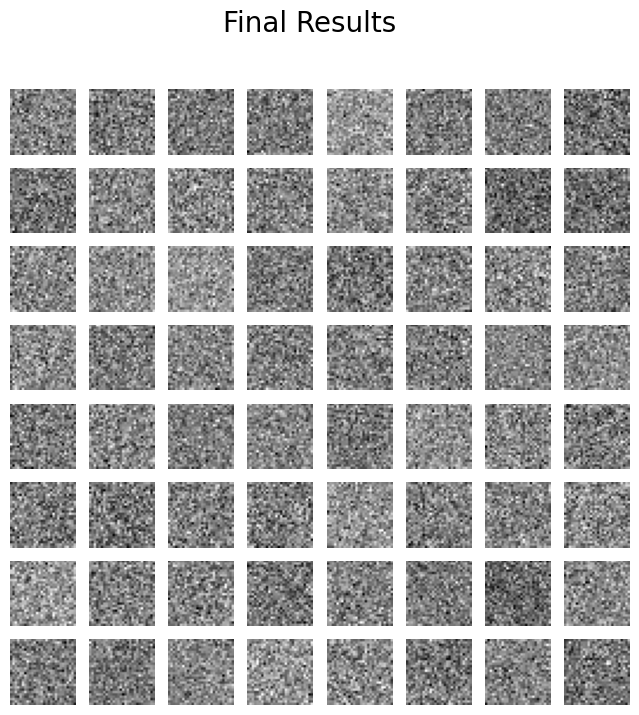

In [3]:
generated = generate_new_images(ddpm, n_samples=64, device=device, gif_name="gifs/mlp_mnist.gif")
show_images(generated, "Final Results")